In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [5]:
data = pd.read_sql('''SELECT * FROM usd_coin''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,USD Coin,USDC,2018-10-09 23:59:59,1.00833,1.00003,1.00427,1.00686,108803.0,0.0
1,2,USD Coin,USDC,2018-10-10 23:59:59,1.01908,1.00397,1.00494,1.00962,711783.0,0.0
2,3,USD Coin,USDC,2018-10-11 23:59:59,1.03123,1.00173,1.00994,1.00978,4177290.0,0.0
3,4,USD Coin,USDC,2018-10-12 23:59:59,1.01871,1.00114,1.00861,1.01272,1322240.0,0.0
4,5,USD Coin,USDC,2018-10-13 23:59:59,1.02029,1.00355,1.01445,1.00743,698507.0,0.0


In [6]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [7]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1002 non-null   object 
 1   Symbol      1002 non-null   object 
 2   Date        1002 non-null   object 
 3   High        1002 non-null   float64
 4   Low         1002 non-null   float64
 5   Open        1002 non-null   float64
 6   Close       1002 non-null   float64
 7   Volume      1002 non-null   float64
 8   Marketcap   1002 non-null   float64
 9   Range       1002 non-null   float64
 10  Difference  1002 non-null   float64
dtypes: float64(8), object(3)
memory usage: 86.2+ KB


In [8]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        1002 non-null   object        
 1   Symbol      1002 non-null   object        
 2   Date        1002 non-null   datetime64[ns]
 3   High        1002 non-null   float64       
 4   Low         1002 non-null   float64       
 5   Open        1002 non-null   float64       
 6   Close       1002 non-null   float64       
 7   Volume      1002 non-null   float64       
 8   Marketcap   1002 non-null   float64       
 9   Range       1002 non-null   float64       
 10  Difference  1002 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 86.2+ KB


In [10]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,1002.000000,1002.000000,1002.000000,1002.000000,1.002000e+03,1.002000e+03,1002.000000,1002.000000
mean,1.010327,0.998496,1.003767,1.003791,6.513472e+08,3.029697e+09,0.011831,0.000024
std,0.011015,0.007548,0.006843,0.006822,8.595553e+08,5.541499e+09,0.011971,0.004694
min,1.000082,0.929222,0.967938,0.970124,1.088030e+05,0.000000e+00,0.000362,-0.031542
25%,1.001768,0.996038,1.000019,1.000017,1.058256e+08,3.592595e+08,0.002687,-0.001241
50%,1.007303,0.999263,1.001087,1.001152,3.178717e+08,4.838460e+08,0.010017,0.000028
75%,1.015262,1.000149,1.005420,1.005395,7.773591e+08,2.807820e+09,0.016074,0.001363
max,1.113730,1.023058,1.043627,1.044029,8.053431e+09,2.579198e+10,0.131203,0.042769


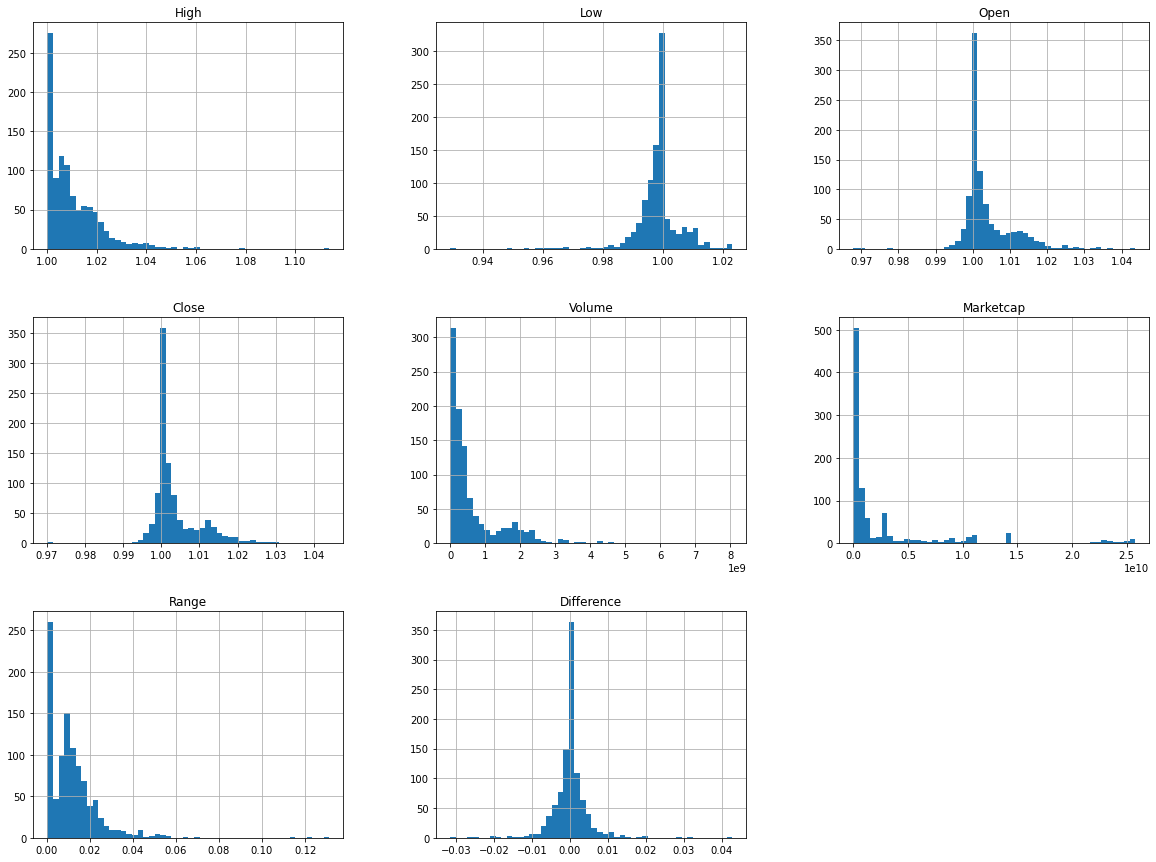

In [11]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [12]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,521,525,39,65,67,49,537,101,536,479
Date,2020-03-13 23:59:59,2020-03-17 23:59:59,2018-11-17 23:59:59,2018-12-13 23:59:59,2018-12-15 23:59:59,2018-11-27 23:59:59,2020-03-29 23:59:59,2019-01-18 23:59:59,2020-03-28 23:59:59,2020-01-31 23:59:59
Difference,-0.031542,-0.026139,-0.02432,-0.020858,-0.020453,-0.02032,-0.019532,-0.015946,-0.015327,-0.015253


In [13]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,520,527,538,100,478,48,491,535,362,199
Date,2020-03-12 23:59:59,2020-03-19 23:59:59,2020-03-30 23:59:59,2019-01-17 23:59:59,2020-01-30 23:59:59,2018-11-26 23:59:59,2020-02-12 23:59:59,2020-03-27 23:59:59,2019-10-06 23:59:59,2019-04-26 23:59:59
Difference,0.042769,0.03198,0.02844,0.020335,0.019625,0.0191,0.018603,0.017775,0.01463,0.014184


In [14]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [15]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [16]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

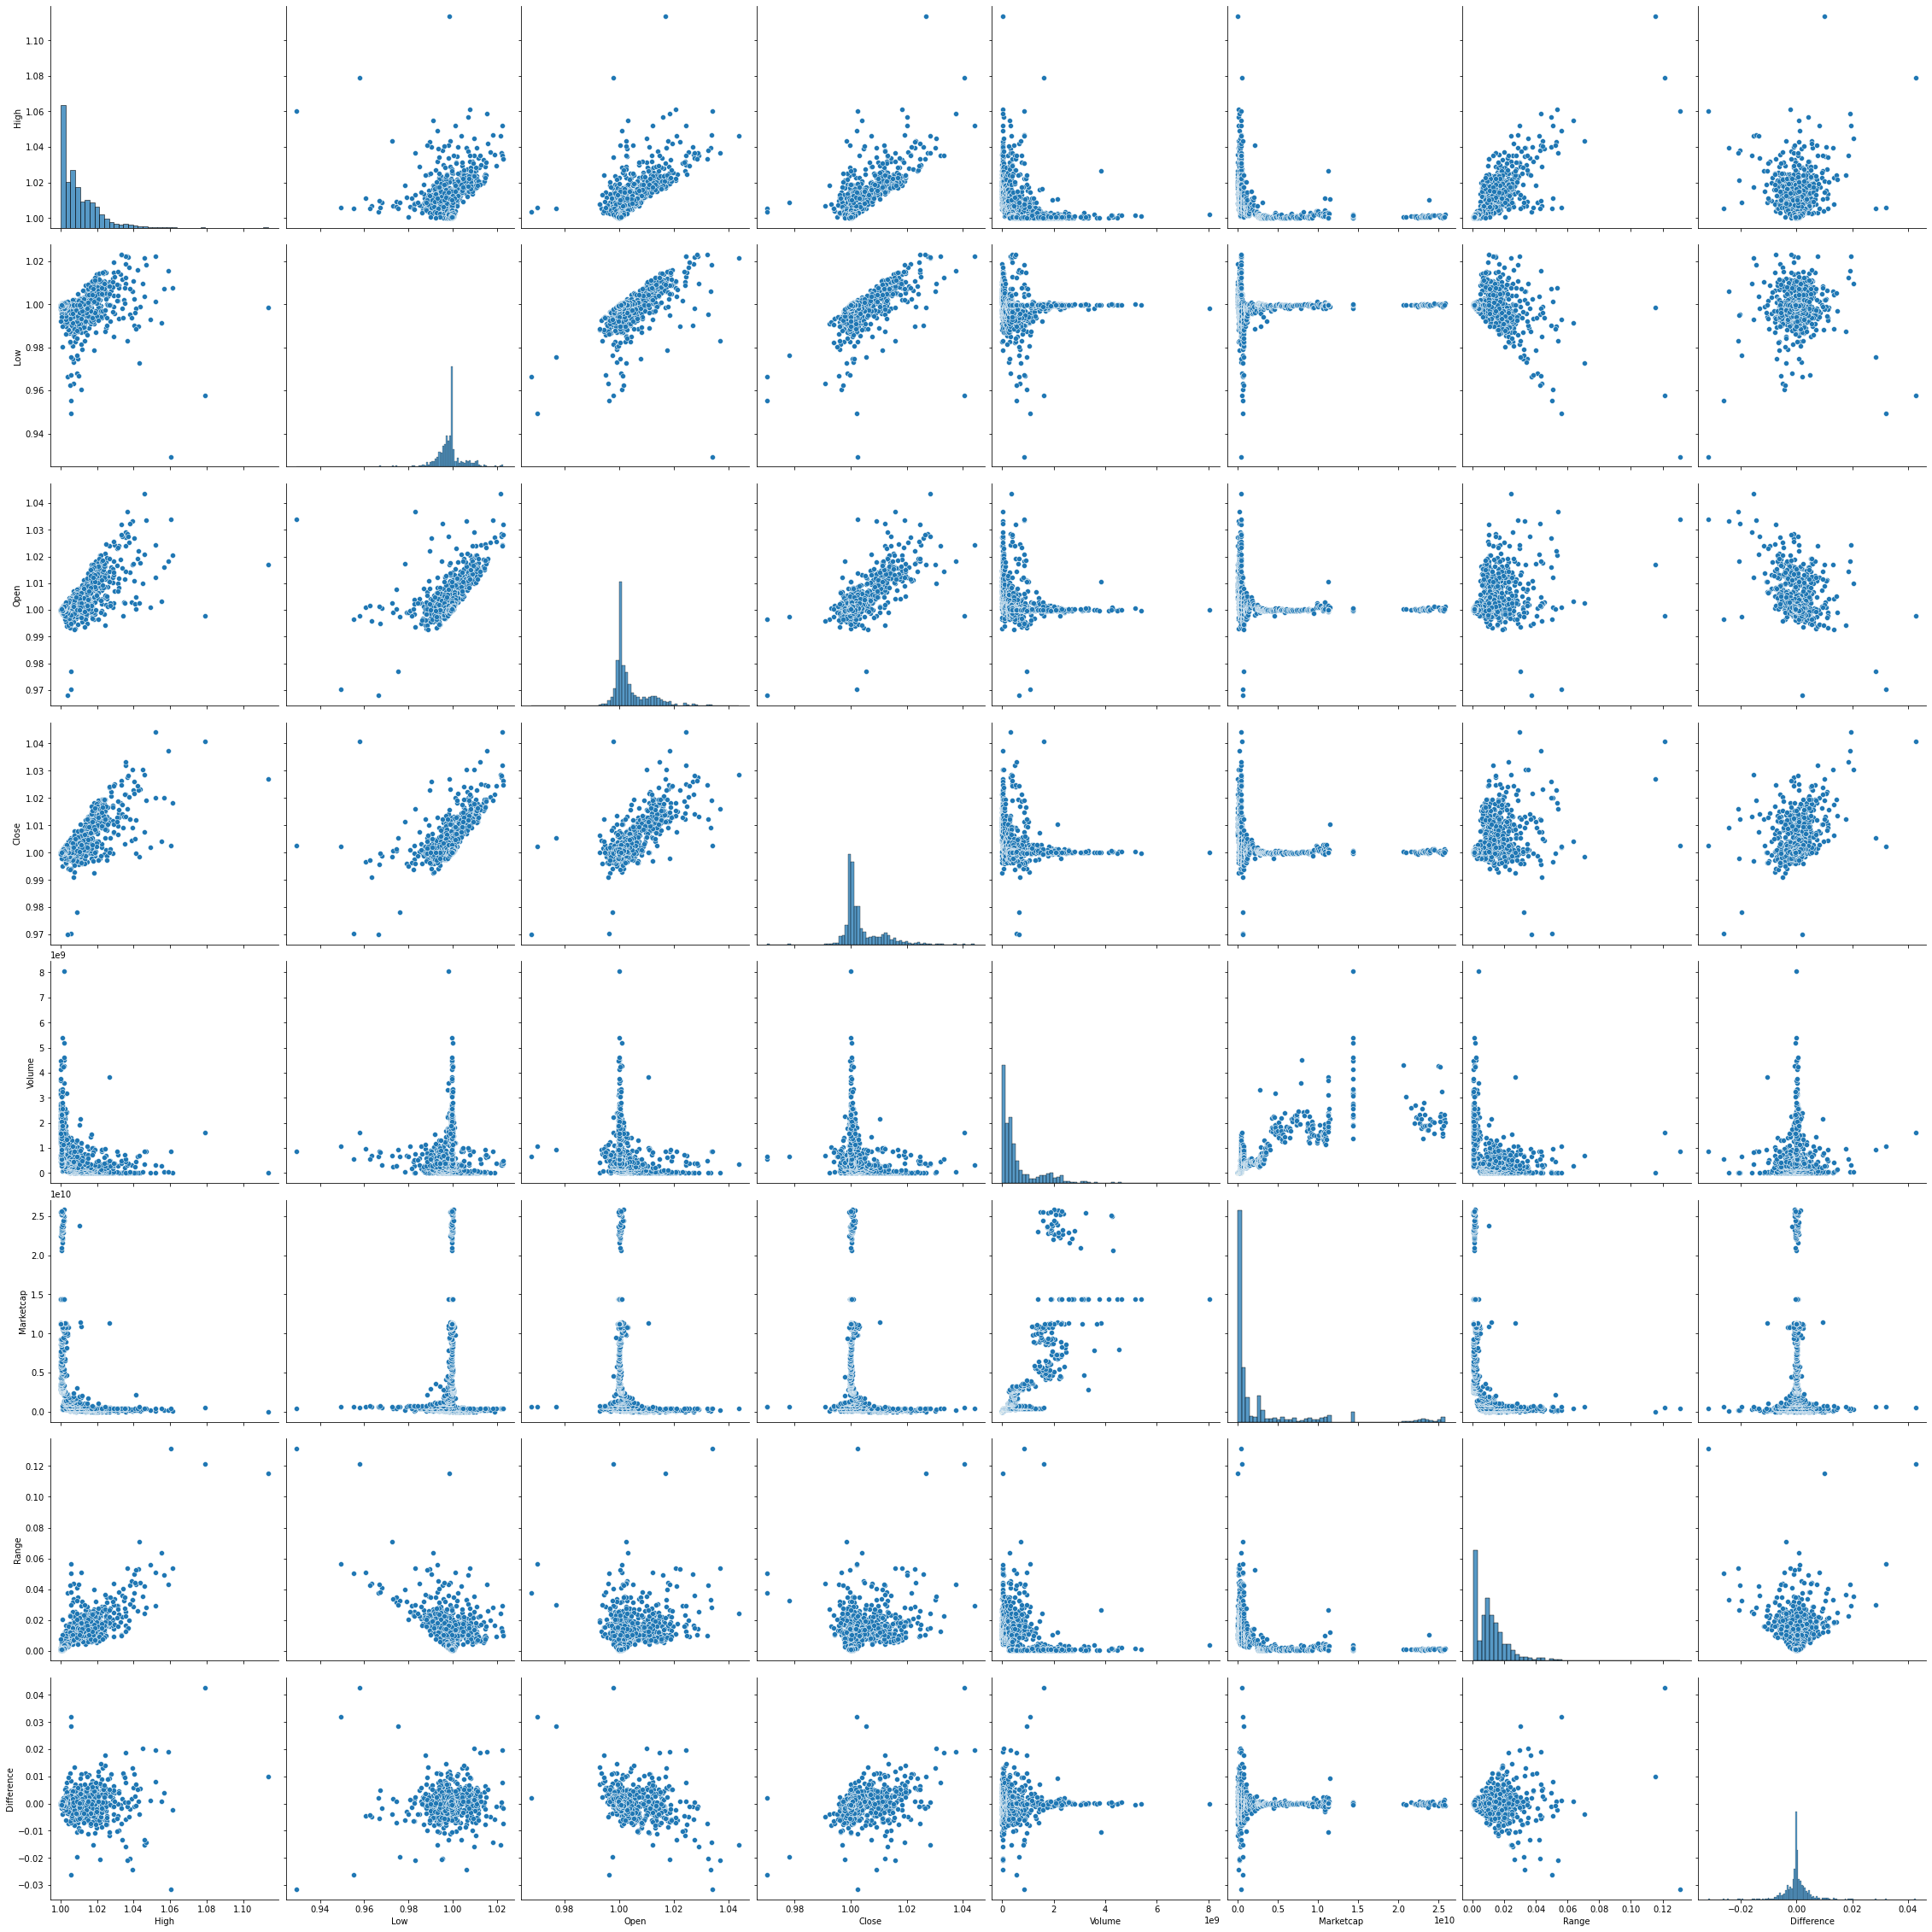

In [17]:
sns.pairplot(data,height=4);
